In [54]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
from parsing import parser, digit
from plotting import plotter, voronoi
from analysis import training
from config import settings

In [57]:
parse = parser.Parser();
train_digits = parse.parse_file('data/pendigits-train');
test_digits = parse.parse_file('data/pendigits-test')

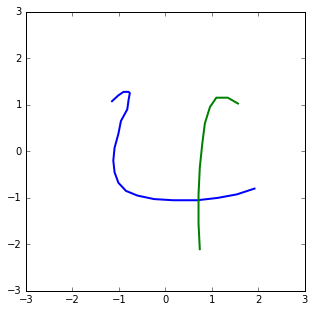

In [58]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(train_digits[6], True)

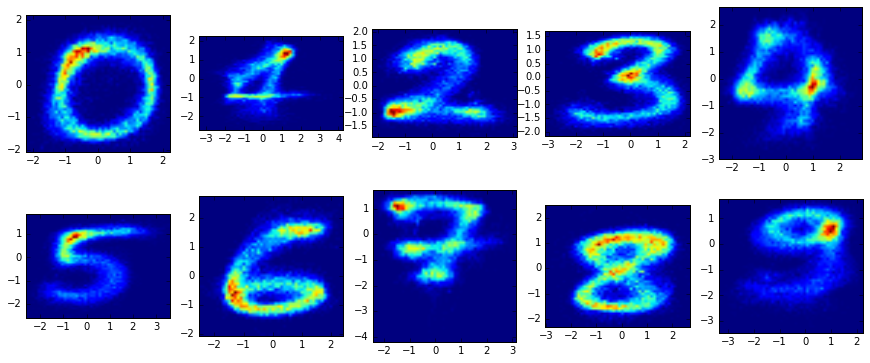

In [59]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digits_heatmap(train_digits, True);

In [60]:
centroids = training.get_digit_kmeans_centroids(train_digits, settings.N_OBSERVATION_CLASSES - 2)

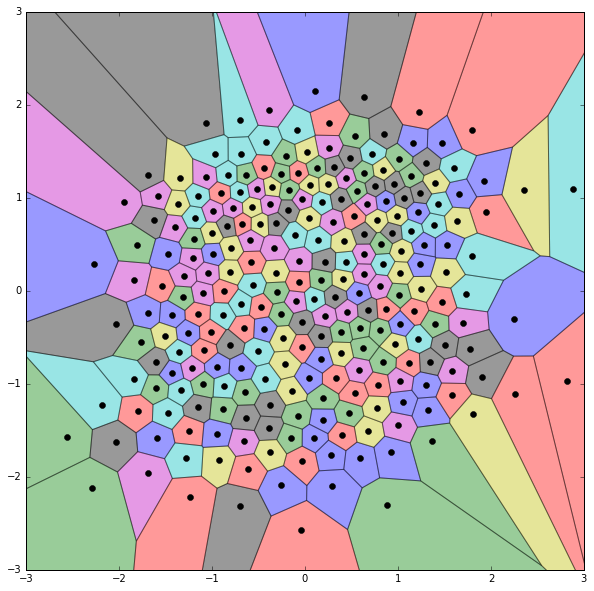

In [61]:
pylab.rcParams['figure.figsize'] = (10, 10);
voronoi.plot_centroids(centroids);

In [51]:
training.set_digit_observations(train_digits, centroids)

In [52]:
print(train_digits[6].np_array_observations)

[14  6  8  8  8  8  8  8  6 12 12 12  2  2  2 13 13  1  1 11 11 11 15 14  9
  9  5  5  7  7  3  1  1  1 15]
